### READING AND WRITING MOLECULES

&nbsp;

#### IMPORTING OF ALL NECESSARY LIBRARIES

In [102]:
import os
import pickle

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.six import StringIO
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import Draw

from utils import Mol2MolSupplier

Important information!!! Sometimes we do not need to take into account Hydrogen atoms and RDKit gives us this ability. </br>
We can simply forward `removeHs` flag as True into above-mentioned function to get rid of Hydrogens.

#### TRYING SOMETHING SIMPLE

First of all we should come up wit some compounds, which we are going to use. They could anything you use in your chemistry life or something simple. <br />
Like benzene!  <br />

To describe the benzene molecule we use popular representation of molecules - **SMILES**. Which stands for **Simplified Molecular Input Line Entry System**.

In [4]:
SMILES_benzene = 'c1ccccc1'
m = Chem.MolFromSmiles(SMILES_benzene)

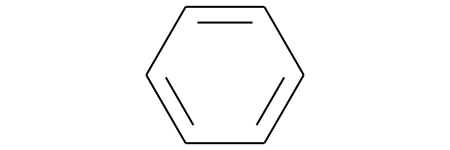

In [8]:
m #Let's look at this beautiful molecule

Also there is an another way to describe a molecule and store information about. It is so-called **Structure-data file**, which stores structural information for a molecule. <br />
It wraps the **molfile (MDL Molfile)** format, where holds information about the atoms, bonds, connectivity and coordinates of a molecule. 

In [12]:
m = Chem.MolFromMolFile('benzene.sdf', removeHs=True) #For our example we can open SDF file now with MolFromMolFile function unless we do not have more molfiles in the .sdf file

Important information!!! Sometimes we do not need to take into account Hydrogen atoms and RDKit gives us this ability. </br>
We can simply forward `removeHs` flag as True into above-mentioned function to get rid of Hydrogens.

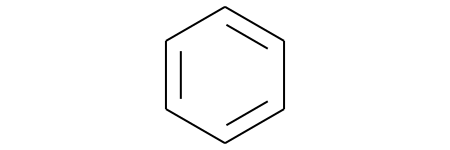

In [14]:
m  #Let's look again

All of the above-mentioned methods return `rdkit.Chem.rdchem.Mol` RDKit object, which has nice properties and will be used throughout the lesson.

RDKit allows us to see some problems with our molecules via warning or error messages. <br />
Like something below

In [19]:
bad_SMILES = 'CO(C)C'
m1 = Chem.MolFromSmiles(bad_SMILES)

[15:01:25] Explicit valence for atom # 1 O, 3, is greater than permitted


In [23]:
m1 # Nothing to see here

In [22]:
m1 is None # Also the method outputs None

True

Going back to reading a SDF file.. Let's try some RDKit method and see what it does <br />

In [48]:
sdf_mol = Chem.SDMolSupplier('benzene.sdf') # Just read

In [49]:
for mol in sdf_mol:
    print(mol.GetNumAtoms()) # And we have only one molecule! Which totally makes sense and it has six atoms, which is true!

6


Important information!!! As you can see the result of `SDMolSupplier` is iterable object, which means that we can iterate this object through the loop - which in fact we did. 😊 </br>

In [50]:
mols = [x for x in sdf_mol] # Anyway, how many molecules do we have? Another check 
len(mols)

1

Sometimes it's important to read `mol2` format files. This `mol2` format is plain text tabular format that represents a single or multiple chemical compounds and holds atomic coordinates, chemical bond information, and metadata of a molecule. </br>
For this purpose we use the function, which is based on `Chem` RDkit library. The details of it will be presented later.

In [106]:
mols = Mol2MolSupplier("benzene.mol2") # Ant it's also an interable object!

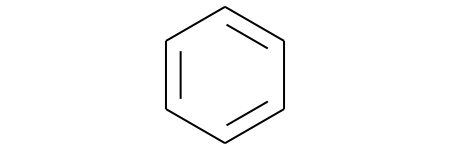

In [107]:
mols[0]

#### WRITING MOLECULES

What if someone wants to write/save molecules? It's not a problem. Let's try it!

In [31]:
Chem.MolToMolBlock(m), file=open('example_benzene.mol','w+') # If you want to write it as a mol file

In [32]:
with Chem.SDWriter('example_benzene.sdf') as w:
    for m in mols:
        w.write(m) # If you want to write it as a sdf file

if you open saved .sdf file, you will see a lot of information stored there, not only Chemical table

Let's draw our molecule to .png file

In [35]:
Draw.MolToFile(m, 'benzene.png') # this submodule does the job

In [36]:
from PIL import Image

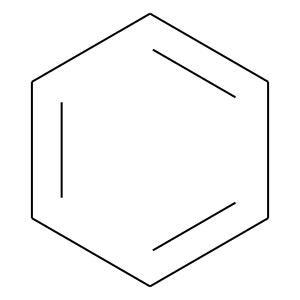

In [37]:
im = Image.open("benzene.png") 
im.show()  # This method will show image in any image viewer 

What a nice molecule we have! 😊